In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from PIL import Image

# Load the grayscale image (replace with your image path)

image = Image.open('/content/drive/MyDrive/6.png').convert('L') # Convert to grayscale
image = image.resize((100, 100))

In [ ]:
# Convert the image to a numpy array (since it's already grayscale)
image_array = np.array(image)

# Threshold the image: Anything above a certain value becomes 1 (white), else -1 (black)
threshold = 0.5  # You can adjust this threshold value based on your image
matrix = np.where(image_array > threshold, 1, -1)

In [ ]:
import numpy as np

# Create a 10x10 matrix for "C" pattern using -1 (black) and 1 (white)
c_matrix = np.array([
    [-1,  1,  1,  1,  1,  1,  1,  1,  1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1,  1,  1,  1,  1,  1,  1,  1, -1]
])

In [ ]:
# Function to apply convolution (without padding)
def apply_convolution(image, filter_matrix):
    # Get dimensions of the image and filter
    # Correctly unpack the shape tuple into image_height and image_width
    image_height, image_width = image.shape[0], image.shape[1]
    filter_height, filter_width = filter_matrix.shape

    # Output matrix will be smaller than the original image
    output_height = image_height - filter_height + 1
    output_width = image_width - filter_width + 1

    # Initialize the output matrix
    output = np.zeros((output_height, output_width))

    # Convolve the filter over the image
    for i in range(output_height):
        for j in range(output_width):
            # Get the submatrix of the image
            submatrix = image[i:i+filter_height, j:j+filter_width]
            # Perform element-wise multiplication and sum
            output[i, j] = np.sum(submatrix * filter_matrix)

    return output

In [ ]:
output=apply_convolution(matrix, c_matrix)

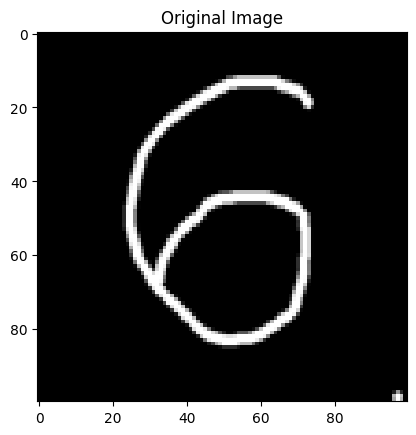

In [ ]:
# prompt: plot the actual image

import matplotlib.pyplot as plt

# Assuming 'image' is your PIL Image object (loaded previously)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

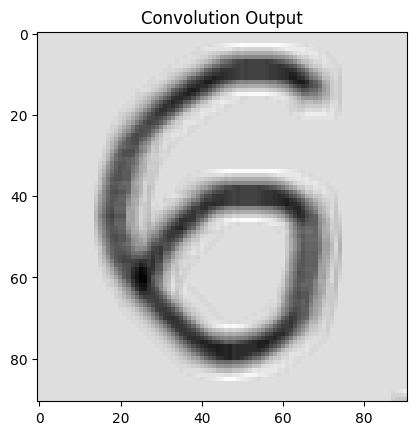

In [ ]:
# prompt: plot the output

import matplotlib.pyplot as plt

plt.imshow(output, cmap='gray')
plt.title('Convolution Output')
plt.show()

Using 10 random filters


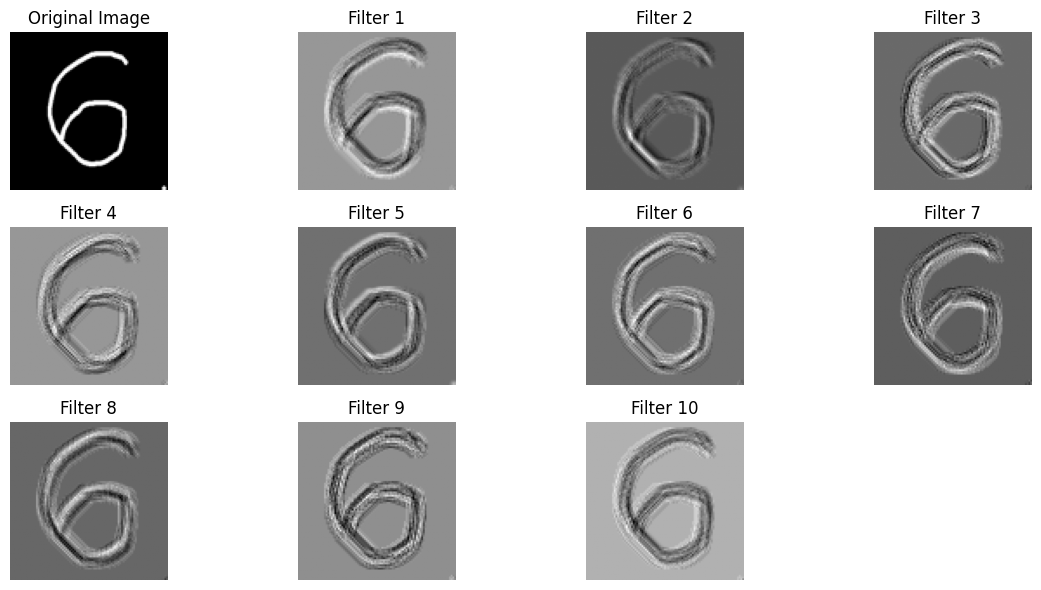

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the grayscale image (ensure it's 100x100)
image = Image.open('/content/drive/MyDrive/6.png').convert('L')
image = image.resize((100, 100))  # Resize to 100x100 if needed
image_array = np.array(image)

# Convert image to binary (-1 for black, 1 for white)
threshold = 128  # Since image values are 0-255, 128 is the middle
matrix = np.where(image_array > threshold, 1, -1)

# Define the fixed C-shaped kernel (10x10)
c_matrix = np.array([
    [-1,  1,  1,  1,  1,  1,  1,  1,  1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1,  1,  1,  1,  1,  1,  1,  1, -1]
])

# Function to apply convolution
def apply_convolution(image, filter_matrix):
    image_height, image_width = image.shape
    filter_height, filter_width = filter_matrix.shape

    output_height = image_height - filter_height + 1
    output_width = image_width - filter_width + 1
    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            submatrix = image[i:i+filter_height, j:j+filter_width]
            output[i, j] = np.sum(submatrix * filter_matrix)

    return output

# Generate 10 random filters (each 10x10 with values between -1 and 1)
random_filters = [np.random.uniform(-1, 1, (10, 10)) for _ in range(10)]

# Apply convolution using each random filter
outputs = [apply_convolution(matrix, c_matrix * rf) for rf in random_filters]

# Plot original image
plt.figure(figsize=(12, 6))
plt.subplot(3, 4, 1)  # Use a 3x4 grid for better spacing
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Plot convolution outputs (Start from index 2)
for i, output in enumerate(outputs):
    plt.subplot(3, 4, i + 2)  # Now, this fits within a 3x4 grid

    plt.imshow(output, cmap='gray')
    plt.title(f'Filter {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()
